In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [78]:
x=6*np.random.rand(200,1)-3
y=0.8*x**2+0.9*x+2+np.random.randn(200,1)

# y=0.8x^2+0.9x+2

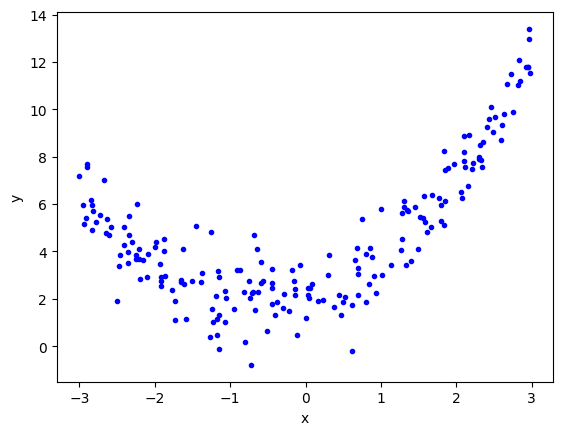

In [79]:
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [80]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
# applying Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [82]:
p_pred=lr.predict(x_test)
r2_score(y_test,p_pred)

0.314299964152551

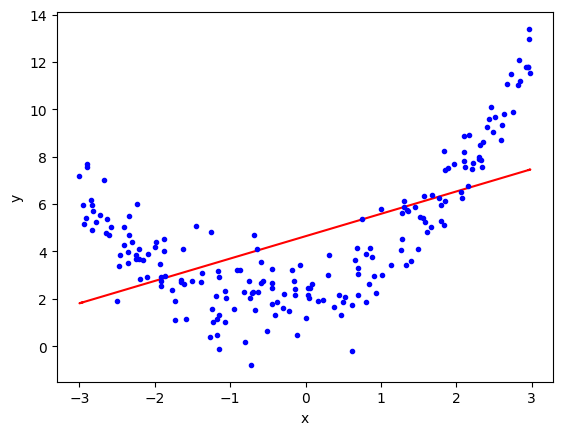

In [83]:
plt.plot(x_train,lr.predict(x_train),'r')
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [84]:
# Applying polynomial Linear Regression
# degree 2
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

In [85]:
print(x_train[0])
print(x_train_poly[0])

[-2.95499287]
[ 1.         -2.95499287  8.73198286]


In [86]:
 # include_bias parameter

In [87]:
lr=LinearRegression()
lr.fit(x_train_poly,y_train)

LinearRegression()

In [88]:
y_pred=lr.predict(x_test_poly)
r2_score(y_test,y_pred)

0.8857378019919235

In [89]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.89675467 0.80717881]]
[2.12443879]


In [90]:
x_new=np.linspace(-3,3,100).reshape(100,1)
x_new_poly=poly.transform(x_new)
y_new=lr.predict(x_new_poly)

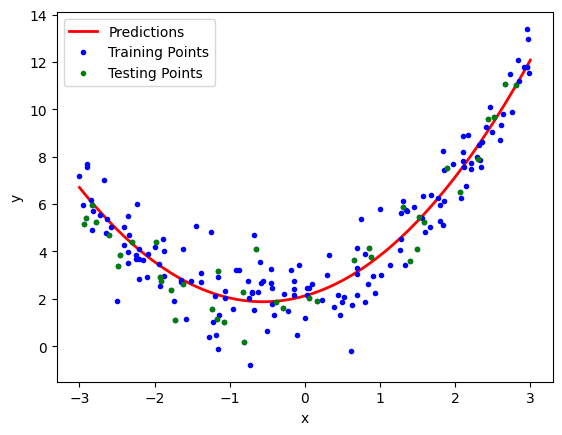

In [91]:
plt.plot(x_new,y_new,'r-',linewidth=2,label="Predictions")
plt.plot(x,y,'b.',label='Training Points')
plt.plot(x_test,y_test,'g.',label='Testing Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [92]:
def polynomial_regression(degree):
  x_new=np.linspace(-3,3,100).reshape(100,1)
  x_new_poly=poly.transform(x_new)

  polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
  std_scaler=StandardScaler()
  lin_reg=LinearRegression()
  polynomial_regression=Pipeline([
      ('poly_features',polybig_features),
      ('std_scaler',std_scaler),
      ('lin_reg',lin_reg)
  ])
  polynomial_regression.fit(x,y)
  y_newbig=polynomial_regression.predict(x_new)
  plt.plot(x_new,y_newbig,'r-',label='Degree'+str(degree),linewidth=2)
  plt.plot(x,y,'b.',label='Training Points')
  plt.plot(x_test,y_test,'g.',label='Testing Points')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.axis([-3,3,-1,10])
  plt.show()

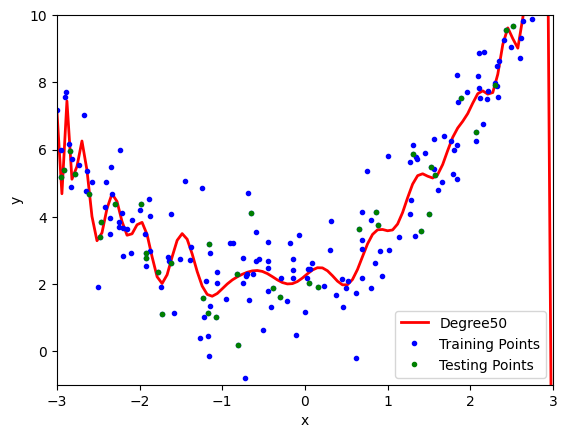

In [93]:
polynomial_regression(50)

In [94]:
# 3d polynomial Regression
x=7*np.random.rand(100,1)-2.8
y=7*np.random.rand(100,1)-2.8

z=x**2+ y**2+ 0.2*x+ 0.2*y+ 0.1*x*y+2+np.random.rand(100,1)
# z=x^2 + y^2+ 0.2x + 0.2y+ 0.1xy +2

In [95]:
import plotly.express as px
df=px.data.iris()
fig=px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [96]:
lr=LinearRegression()
lr.fit(np.hstack((x,y)),z)

x_input=np.linspace(x.min(),x.max(),10)
y_input=np.linspace(y.min(),y.max(),10)
xGrid,yGrid=np.meshgrid(x_input,y_input)

final=np.vstack([xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100)]).T
z_final=lr.predict(final).reshape(10,10)

In [97]:
import plotly.express as px
import plotly.graph_objects as go
df=px.data.iris()
fig=px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.show()

In [98]:
x_multi=np.hstack((x,y)).reshape(100,2)
x_multi.shape

(100, 2)

In [99]:
poly=PolynomialFeatures(degree=2)
x_multi_poly=poly.fit_transform(x_multi)

In [103]:
print('Input',poly.n_features_in_)
print('Output',x_multi_poly.shape[1])
print('Powers\n',poly.powers_)

Input 2
Output 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [104]:
x_multi_poly.shape

(100, 6)

In [105]:
lr=LinearRegression()
lr.fit(x_multi_poly,z)

LinearRegression()

In [106]:
X_test_multi=poly.transform(final)

In [108]:
z_final=lr.predict(X_test_multi).reshape(10,10)

In [111]:
fig=px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.update_layout(scene=dict(zaxis=dict(range=[0,35])))
fig.show()